# Special Distributions ($\mathrm{Gamma}$, $\mathrm{Beta}$, $\chi^2$, $\mathrm{Student}$-$t$, $\mathrm{Snedecor}$-$F$)

In this notebook, we visualize some special distributions that we are going to come across in this class. You can find these and many other distributions in the scipy.stats module:

https://docs.scipy.org/doc/scipy/reference/stats.html#module-scipy.stats

## The Gamma distribution

The Gamma distribution is a two parameter family of distribution with common support on the positive half-line having density function (cdf):

$$f_{\mathrm{Gamma}(\alpha,\beta)}(x)=\frac{x^{\alpha-1}e^{-x/\beta}}{\Gamma(\alpha)\beta^\alpha},\qquad x\geq 0,\quad\alpha>0,\quad\beta>0,$$

where the Gamma function is defined as the integral

$$\Gamma(\alpha)=\int_0^{\infty}t^{\alpha-1}e^{-t}dt.$$

As we discussed in class $\Gamma(\alpha+1)=\alpha\Gamma(\alpha)$ and $\Gamma(1)=1$, which together imply $\Gamma(n)=(n-1)!$ when $n\geq 1$ is an integer. What about other values of $\alpha$?

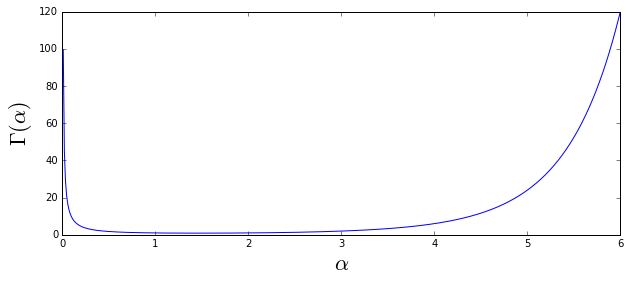

In [27]:
import numpy as np
from scipy import special
import matplotlib.pyplot as plt
%matplotlib inline

x = np.linspace(0.01,6,500)
plt.figure(figsize = (10,4))
plt.plot(x, special.gamma(x))
plt.xlabel(r'$\alpha$', fontsize = 22)
plt.ylabel(r'$\Gamma(\alpha)$', fontsize = 22)

plt.show()

The general shape of the Gamma distribution's cdf with $\alpha = 2$ and $\beta = 1$ (play around with these parameters, including fractional values, to see how the distribution behaves):

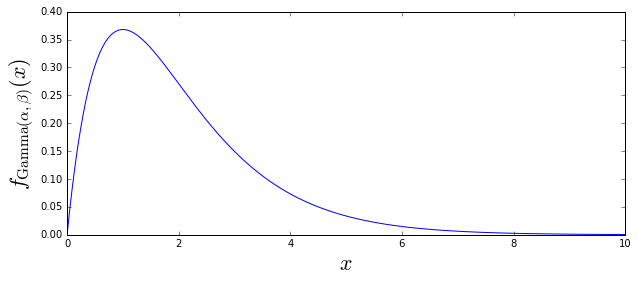

In [90]:
from scipy import stats

x = np.linspace(0.01,10,500)
plt.figure(figsize = (10,4))
plt.plot(x, stats.gamma.pdf(x, a = 2, scale = 1))
plt.xlabel(r"$x$", fontsize=22)
plt.ylabel(r"$f_{\mathrm{Gamma}(\alpha,\beta)}(x)$", fontsize = 22)
plt.show()

Other fun facts about Gamma distribution:

* $Gamma(1,\beta) = Exp(\beta)$
* If $X_1,X_2,\dots, X_n$ are i.i.d. $Exp(\beta)$, then $\sum_{i=1}^nX_i\sim Gamma(n,\beta)$.
* The previous is a special case of: $X_1,\dots,X_n$ are i.i.d. $Gamma(\alpha_i,\beta)$ then $\sum_{i=1}^nX_i\sim Gamma(\sum_{i=1}^n\alpha_i,\beta)$

## The Beta distribution

The Gamma distribution is a two parameter family of distribution with common support on the interval $[0,1]$ having density function (cdf):

$$f_{\mathrm{Beta}(\alpha,\beta)}(x)=\frac{x^{\alpha-1}(1-x)^{\beta-1}}{B(\alpha,\beta)},\qquad x\in[0,1],\quad \alpha>0,\quad \beta>0, $$

where the Beta function is defined by

$$B(\alpha,\beta)=\int_0^1x^{\alpha-1}(1-x)^{\beta-1}dx=\frac{\Gamma(\alpha)\Gamma(\beta)}{\Gamma(\alpha+\beta)}$$

Here is a surface plot from the Beta function:

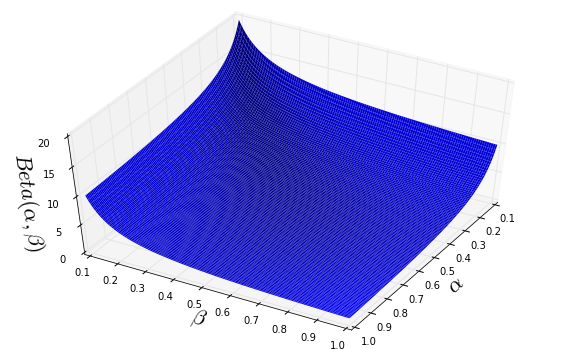

In [63]:
from mpl_toolkits.mplot3d.axes3d import Axes3D

x = np.linspace(0.1,1,500)
y = np.linspace(0.1,1,500)
X,Y = np.meshgrid(x, y)
fig = plt.figure(figsize = (10,6))
ax = fig.add_subplot(1, 1, 1, projection='3d')
ax.plot_surface(X, Y, special.beta(X,Y), rstride=4, cstride=4, linewidth=0)
ax.view_init(50, 30)
ax.set_xlabel(r'$\alpha$', fontsize = 22)
ax.set_ylabel(r'$\beta$', fontsize = 22)
ax.set_zlabel(r'$Beta(\alpha,\beta)$', fontsize = 22)

plt.show()

On the other hand, the beta density with $\alpha=10$ and $\beta = 4$ (again play around with the values to see that this is a very rich family of distributions):

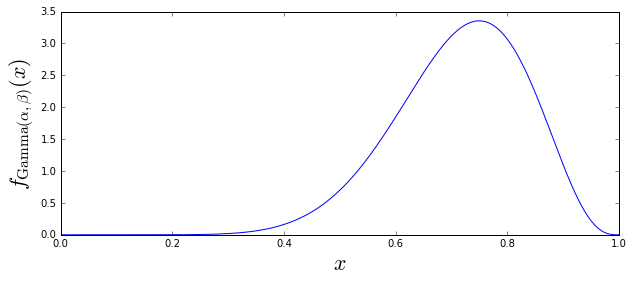

In [82]:
x = np.linspace(0,1,500)
plt.figure(figsize = (10,4))
plt.plot(x, stats.beta.pdf(x, a = 10, b = 4))
plt.xlabel(r"$x$", fontsize=22)
plt.ylabel(r"$f_{\mathrm{Gamma}(\alpha,\beta)}(x)$", fontsize = 22)
plt.show()

## $\chi^2$ distributions

The $\chi^2_p$ distribution with $p$ degrees of freedom is a one parameter family supported on the positive half-line with density:

$$f_{\chi^2_p}(x)=\frac{1}{\Gamma\left(\frac{p}{2}\right)2^{p/2}}x^{\frac{p}{2}-1}e^{-x/2},\qquad x > 0,\quad p>0,$$

You can recognize that this is a special case of the Gamma distribution, namely $Gamma\left(\frac{p}{2},2\right)$. Here is a plot with $p = 3$:

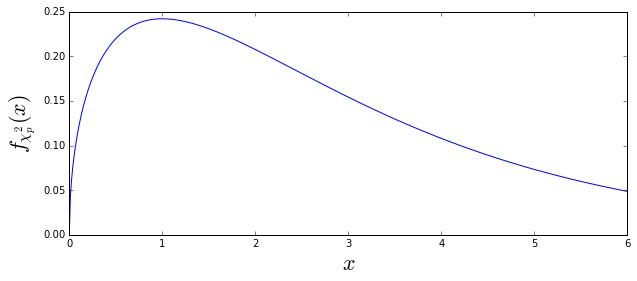

In [92]:
x = np.linspace(0,6,500)
plt.figure(figsize = (10,4))
plt.plot(x, stats.chi2.pdf(x, df = 3))
plt.xlabel(r"$x$", fontsize=22)
plt.ylabel(r"$f_{\chi^2_p}(x)$", fontsize = 22)
plt.show()

Fun facts about $\chi^2_p$ distributions:
* If $X_1,\dots,X_n$ are independent, $X_i\sim\chi^2_{p_i}$, then $\sum_{i=1}^nX_i\sim\chi^2_{\sum_{i=1}^np_i}$.
* The distribution $\chi_1^2$ is the same as that of the square of a standard normal.

 ## Student-t distribution
 
 The Student-t distribution with $p$ degree of freedom is a one parameter family of distributions supported on the entire line with cdf
 
 $$f_{t_p}(t)=\frac{\Gamma\left(\frac{p+1}{2}\right)}{\Gamma\left(\frac{p}{2}\right)}\frac{1}{\sqrt{p\pi}}\frac{1}{\left(1+\frac{t^2}{p}\right)^{\frac{p+1}{2}}},\qquad t\in\mathbb{R},\quad p>0.$$
 
 Here is a plot with $p=3$:

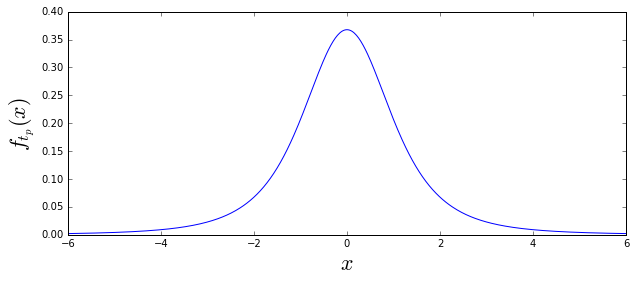

In [97]:
x = np.linspace(-6,6,500)
plt.figure(figsize = (10,4))
plt.plot(x, stats.t.pdf(x, df = 3))
plt.xlabel(r"$x$", fontsize=22)
plt.ylabel(r"$f_{t_p}(x)$", fontsize = 22)
plt.show()

It looks similar to the normal distribution however, it qualitatively very different due to the polynomial tail. In particular the moments of order greater than or equal to $p$ do not exist (or the even ones can be said to be infninite). Other fun facts:
* If $U$ is a standard normal and $V$ is $\chi_p^2$ distributed independent of $U$, then $U/\sqrt{V/p}$ has distribution $t_p$.
* If $X_1,\dots,X_n$ are i.i.d. $\mathcal{N}(\mu,\sigma^2)$, then
$$ \frac{\bar{X}-\mu}{S_n^2/\sqrt{n}} $$
has distribution $t_{n-1}$, where $\bar{X}$ is the sample mean and $S^2$ is the sample variance.

## $F$-distribution

Finally, the F distribution is with $p$ and $q$ degrees of freedom is a two parameter family supported on the half-line with cdf:

$$f_{F_{p,q}}(x)=\frac{\Gamma\left(\frac{p+q}{2}\right)}{\Gamma\left(\frac{p}{2}\right)\Gamma\left(\frac{q}{2}\right)}\left(\frac{p}{q}\right)^{\frac{p}{2}}\frac{x^{\frac{p}{2}-1}}{\left[1+\frac{p}{q}x\right]^{\frac{p+q}{2}}}$$

Here is a plot with $p=5$, $q=3$:

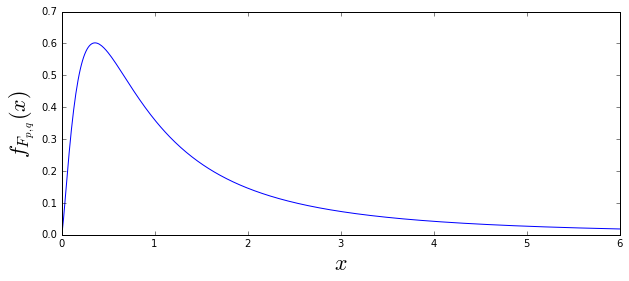

In [107]:
x = np.linspace(0.01,6,500)
plt.figure(figsize = (10,4))
plt.plot(x, stats.f.pdf(x, dfn = 5, dfd = 3))
plt.xlabel(r"$x$", fontsize=22)
plt.ylabel(r"$f_{F_{p,q}}(x)$", fontsize = 22)
plt.show()

This distribution naturally comes up in statistics due to the following facts:
* If $T_1$ and $T_2$ are $\chi_{p}^2$ and $\chi_q^2$ distributed respectively, then
$$\frac{T_1/p}{T_2/q}\sim F_{p,q}$$.
* As a consequence, if $X_1,\dots,X_n$ are i.i.d. $\mathcal{N}(\mu_X,\sigma_X^2)$ and $Y_1,\dots,Y_m$ are i.i.d. $\mathcal{N}(\mu_Y,\sigma_Y^2)$, then
$$\frac{S_X^2/S_Y^2}{\sigma_X^2/\sigma_Y^2}\sim F_{n-1,m-1}$$.